In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn
import numpy as np
import sklearn.model_selection as ms

## **DATA PREPARATION**

In [49]:
df = pd.read_csv('/content/Youtube04-Eminem.csv')
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1


In [69]:
pd.unique(pd.Series(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT']))

array(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT'], dtype=object)

In [73]:
cols = ['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT']
#
# Encode labels of multiple columns at once
#
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,278,199,203,11,1
1,322,343,202,153,0
2,425,10,203,369,1
3,301,77,201,83,0
4,433,156,203,125,1


## **DATA VISUALIZATION**

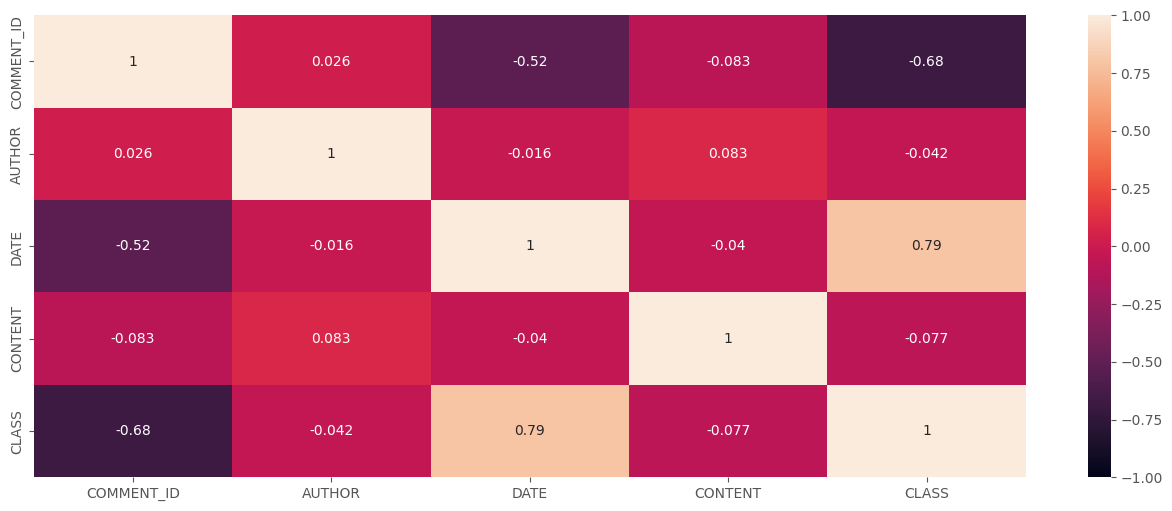

In [78]:
plt.figure(figsize = (16, 6))
df_corr = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

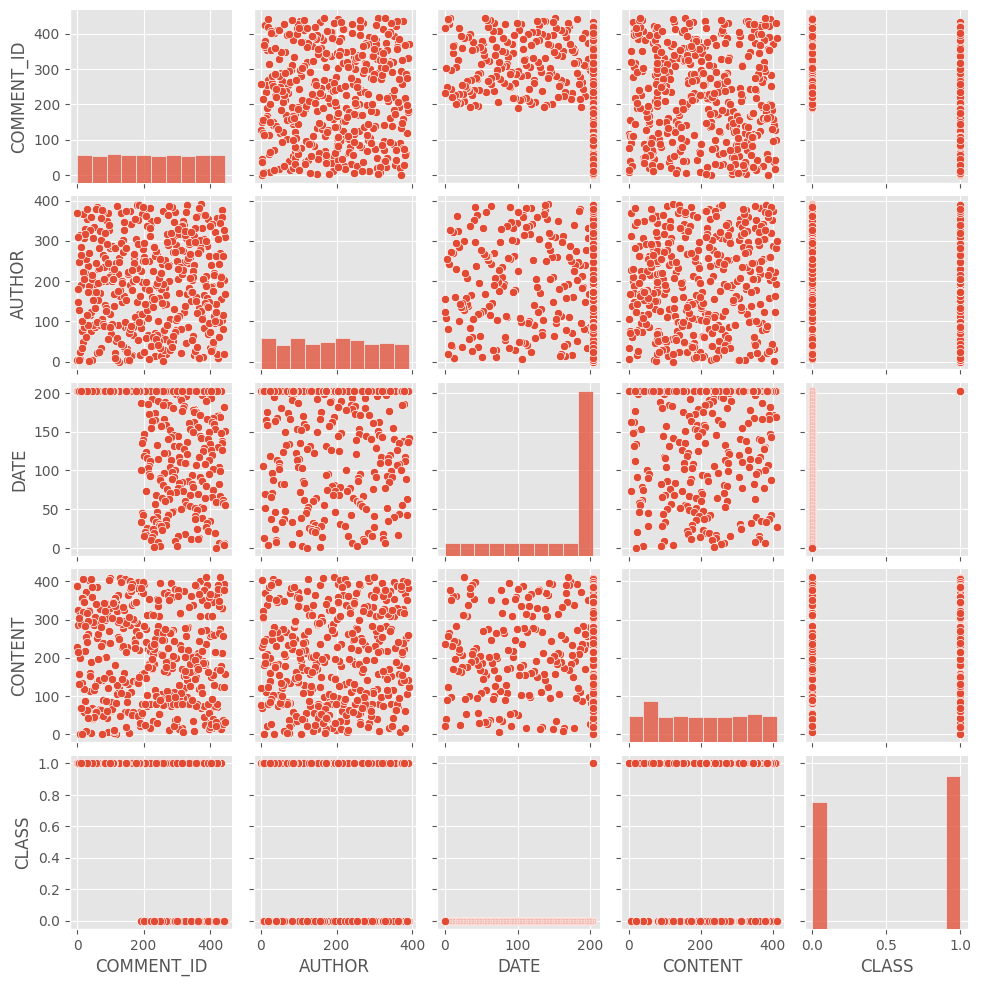

In [79]:
sns.pairplot(data = df, height = 2) 

In [80]:
dataset = df
dataset.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,278,199,203,11,1
1,322,343,202,153,0
2,425,10,203,369,1
3,301,77,201,83,0
4,433,156,203,125,1


In [82]:
x = dataset[['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT']]
y = dataset['CLASS']

In [84]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

*Linear Regression*

In [86]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [88]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  0.18757281311511648
Coefficients:


[('COMMENT_ID', -0.0013320609278543631),
 ('AUTHOR', -1.3683897949653447e-05),
 ('DATE', 0.004754163786557197),
 ('CONTENT', -0.00034718441727439706)]

In [90]:
y_pred_mlr= mlr.predict(x_test)

print("Prediksi pada set test: {}".format(y_pred_mlr))

Prediksi pada set test: [-0.2205665   1.07014609  0.08598832  1.10810281  0.36120042  0.73927848
  0.36927821  0.6011237   0.25454712  0.38609137  1.04601986  0.82128167
  0.85951691  0.99027755  0.01479953  0.94110004  0.89999657  0.96344769
 -0.2400748   0.99352923 -0.00736022  0.96518842  0.15783913  0.17191458
  1.03615645  0.47369855 -0.28977391  0.96631787 -0.11721044  1.03937517
  0.30928125  0.92203496 -0.34335965  0.98594653  0.14552646 -0.10342807
  0.26052847  0.23663694  1.01221523  1.00726145  0.89465236  0.36910702
  0.25942501 -0.05163431  0.06107274  0.25358729  0.5833422   0.35448135
  0.03253271 -0.01228353  0.10843103  0.73448947  0.66627733  0.61325585
  0.6253688  -0.10454058  0.98114534 -0.07312529  0.88094078  0.99748211
  0.01968226  0.36159688  0.7275743   0.32177139  1.05810488  0.9321043
  0.28518215  0.41929873  0.69734319  0.60779699  0.66469549  0.87181038
  0.68270524  0.95813277  0.74840252  0.88100835  0.10473029  0.66117749
  0.93780617  0.40755179  0.

In [91]:
mlr_diff = pd.DataFrame({'Nilai Aktual': y_test, 'Nilai Prediksi': y_pred_mlr})
mlr_diff.head()

,Nilai Aktual,Nilai Prediksi
441,0,-0.220566
410,1,1.070146
171,0,0.085988
444,1,1.108103
127,0,0.361200


<Axes: xlabel='CLASS', ylabel='Density'>

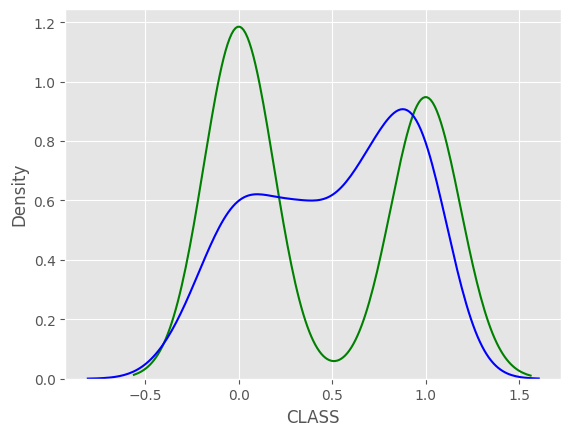

In [94]:
ax1 = sns.kdeplot(y_test, color="g", label="Actual Value")
sns.kdeplot(y_pred_mlr, color="b", label="Fitted Values" , ax=ax1)

**RMSE, MSE dan R^2**





In [98]:
from sklearn import metrics

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Accuracy: {:.2f}'.format(mlr.score(x,y)*100) + "%")

R squared: 72.66
Mean Absolute Error: 0.21641099684368473
Mean Square Error: 0.08275963079105435
Root Mean Square Error: 0.2876797364971234
Accuracy: 72.66%


_*CLASSIFICATION METHOD*_

_Decision Tree_

In [99]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [101]:
y_pred_clf= clf.predict(x_test)

print("Prediksi pada set tes: {}".format(y_pred_clf))

Prediksi pada set tes: [0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1
 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0
 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0]


In [103]:
clf_diff = pd.DataFrame({'Nilai Aktual': y_test, 'Nilai Prediksi': y_pred_clf})
clf_diff.head()

,Nilai Aktual,Nilai Prediksi
441,0,0
410,1,1
171,0,0
444,1,1
127,0,0


In [105]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_clf)*100))

conmat = confusion_matrix(y_test, y_pred_clf)
val = np.mat(conmat) 

classnames = list(set(y_train))

df_cm = pd.DataFrame(

        val, index=classnames, columns=classnames, 

    )

print(df_cm)

Accuracy: 98.52%
    0   1
0  73   2
1   0  60


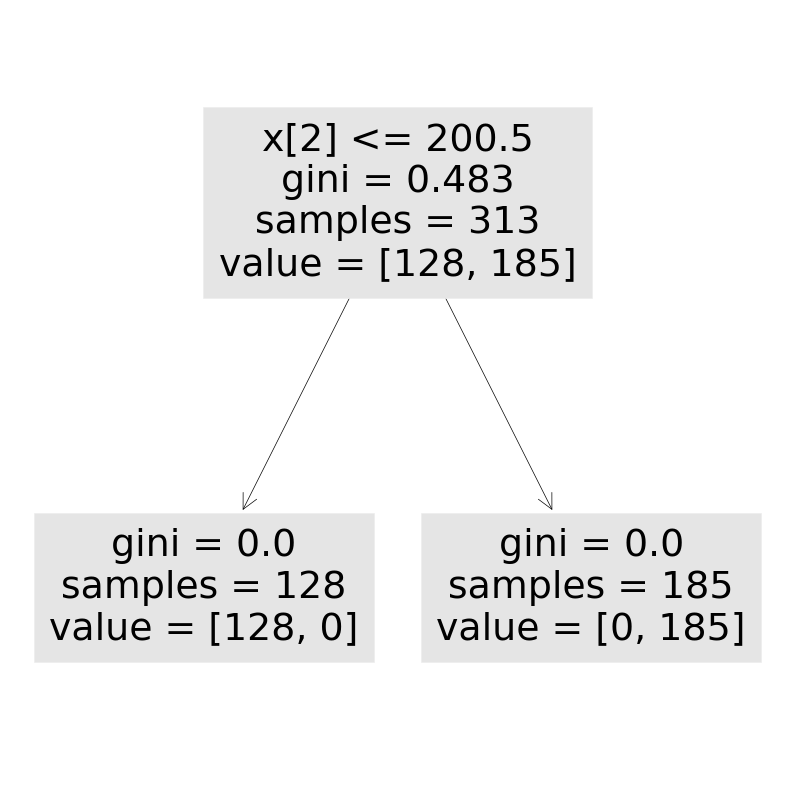

In [122]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf)
plt.show()

_KNN_

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [110]:
knn_method = KNeighborsClassifier()
knn_method.fit(x_train, y_train)
y_pred_knn = knn_method.predict(x_test)
score_knn = metrics.accuracy_score(y_pred_knn, y_test)
print('Akurasi Prediksi method K-NN : ',round(score_knn,8), ' atau ',round(score_knn*100,2),'%', sep='')

Akurasi Prediksi method K-NN : 0.93333333 atau 93.33%


In [111]:
k = 10
mean_acc = []
std_acc = []

for i in range(1,k):
    knn_method = KNeighborsClassifier(n_neighbors = i)
    knn_method.fit(x_train, y_train)
    y_pred_knn = knn_method.predict(x_test)
    mean_acc.append(metrics.accuracy_score(y_pred_knn, y_test))
    std_acc.append(np.std(y_pred_knn==y_test)/np.sqrt(y_pred_knn.shape[0]))
    
mean_acc

[0.9333333333333333,
 0.9111111111111111,
 0.9185185185185185,
 0.9407407407407408,
 0.9333333333333333,
 0.9407407407407408,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333]

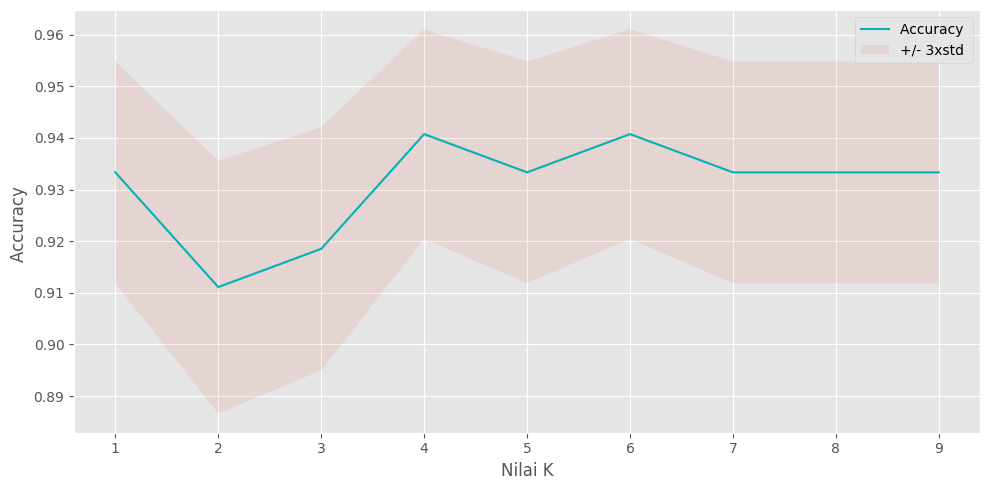

In [112]:
plt.figure(figsize = (10,5))
plt.plot(range(1,k),mean_acc, color='#01b1b5')
plt.fill_between(range(1,k),
                np.array(mean_acc) - 1 * np.array(std_acc),
                mean_acc + 1 * np.array(std_acc), 
                alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Nilai K')
plt.tight_layout()
plt.show()

In [113]:
print("Nilai Akurasi terbaik ada pada ", 
      round(np.array(mean_acc).max()*100,2), 
      "% dengan k = ", np.array(mean_acc).argmax()+1, sep='')

Nilai Akurasi terbaik ada pada 94.07% dengan k = 4


*Naive Bayes*

In [115]:
from sklearn import naive_bayes

In [116]:
bayes_method = naive_bayes.BernoulliNB()
bayes_method.fit(x_train, y_train)
y_pred_bayes = bayes_method.predict(x_test)
score_bayes = metrics.accuracy_score(y_pred_bayes, y_test)
print('Akurasi Prediksi Bayes : ',round(score_bayes,8), ' atau ',round(score_bayes*100,2),'%', sep='')

Akurasi Prediksi Bayes : 0.44444444 atau 44.44%


**CONFUSION MATRIX**


*Decision Tree*

In [125]:
def get_conf_matriks(y_actual, y_predic, cmap = None, title='Tidak ada', ):
    confusion_matrix = metrics.confusion_matrix(y_actual, y_predic)
    ax = sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap = cmap)
    ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
    ax.set_ylabel("Actual", fontsize=14, labelpad=20)
    ax.set_title(title, fontsize=14, pad=20)
    plt.show()
    
    conf_matrix_value = (confusion_matrix[0,0] + confusion_matrix[1,1]) / sum(sum(confusion_matrix))
    print("Hasil Confusion Matriks :" , round(conf_matrix_value*100,2), "%", sep='')

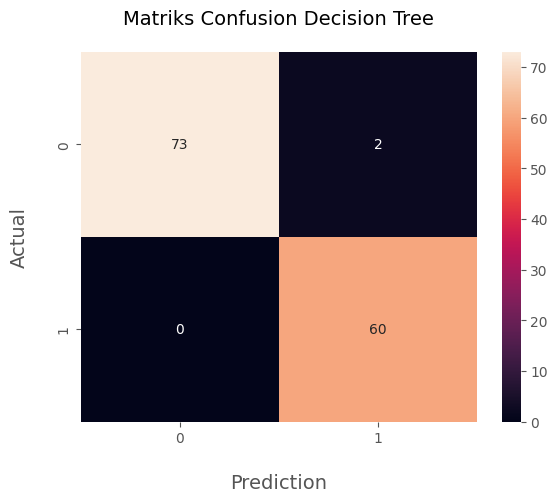

Hasil Confusion Matriks :98.52%


In [126]:
get_conf_matriks(y_test, y_pred_clf, title='Matriks Confusion Decision Tree')

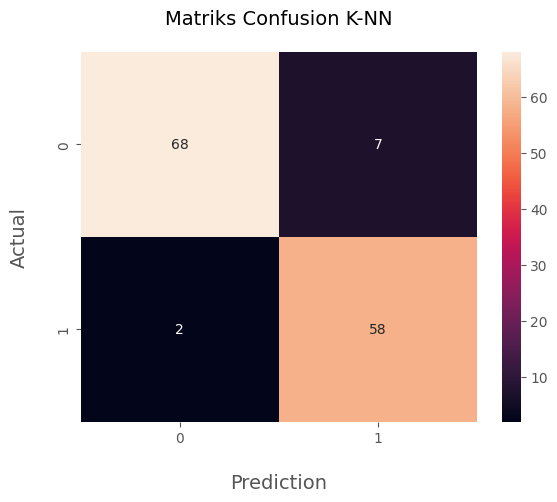

Hasil Confusion Matriks :93.33%


In [128]:
get_conf_matriks(y_test, y_pred_knn, title='Matriks Confusion K-NN')

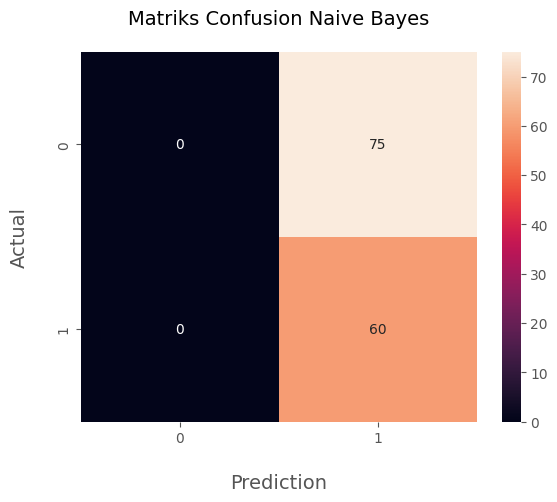

Hasil Confusion Matriks :44.44%


In [129]:
get_conf_matriks(y_test, y_pred_bayes, title='Matriks Confusion Naive Bayes')

## **KESIMPULAN KLASIFIKASI**

Dari ketiga metode klasifikasi diatas, dengan melihat akurasi dan hasil dari confusion matriks dari ketiga metode. Maka Metode yang terbaik untuk melakukan klasifikasi pada dataset yaitu Decision Tree dengan nilai akurasi 98.52%

### **K-Means**

In [130]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
wcss = []
for i in range(1,11):
    method_kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    method_kmeans.fit(x_train, y_train)
    wcss.append(method_kmeans.inertia_)

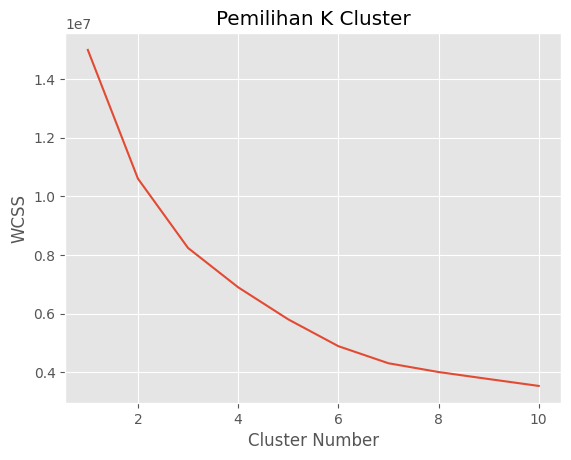

In [136]:
plt.plot(range(1,11), wcss)
plt.title('Pemilihan K Cluster')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

In [137]:
method_kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state = 42, n_init=10)
y_pred_kmeans = method_kmeans.fit_predict(x_test)
y_pred_kmeans

array([0, 1, 2, 1, 0, 0, 2, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1,
       0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2,
       0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 0, 0, 1, 2, 2, 0, 0, 1, 1,
       0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 0, 0, 2, 1, 2, 1, 1, 0,
       1, 0, 0, 0, 2, 1, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 2, 0,
       0, 0, 2], dtype=int32)

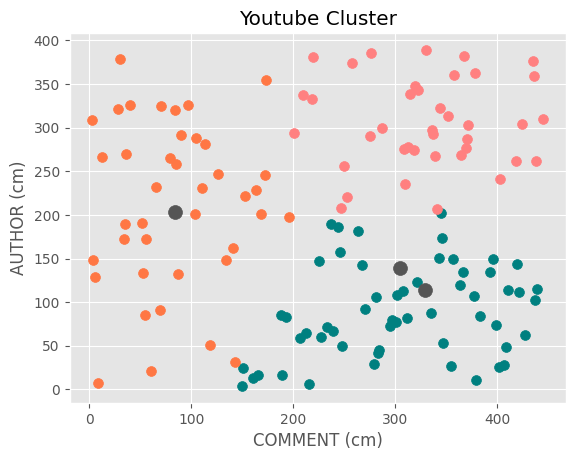

In [139]:
plt.scatter(x_test[y_pred_kmeans == 0]["COMMENT_ID"], x_test[y_pred_kmeans == 0]["AUTHOR"], s = 50, c = '#008080', label = 'Cluster 1')
plt.scatter(x_test[y_pred_kmeans == 1]["COMMENT_ID"], x_test[y_pred_kmeans == 1]["AUTHOR"], s = 50, c = '#FF7744', label = 'Cluster 2')
plt.scatter(x_test[y_pred_kmeans == 2]["COMMENT_ID"], x_test[y_pred_kmeans == 2]["AUTHOR"], s = 50, c = '#FF8080', label = 'Cluster 3')
plt.scatter(method_kmeans.cluster_centers_[:, 0], method_kmeans.cluster_centers_[:, 2], s = 100, c = '#555555', label = 'Centroids')
plt.title('Youtube Cluster')
plt.xlabel('COMMENT (cm)')
plt.ylabel('AUTHOR (cm)')
plt.show()

In [141]:
kmeans_diff = pd.DataFrame({'Nilai Aktual': y_test, 'Nilai Prediksi': y_pred_kmeans})
kmeans_diff.head()

,Nilai Aktual,Nilai Prediksi
441,0,0
410,1,1
171,0,2
444,1,1
127,0,0


<Axes: xlabel='CLASS', ylabel='Density'>

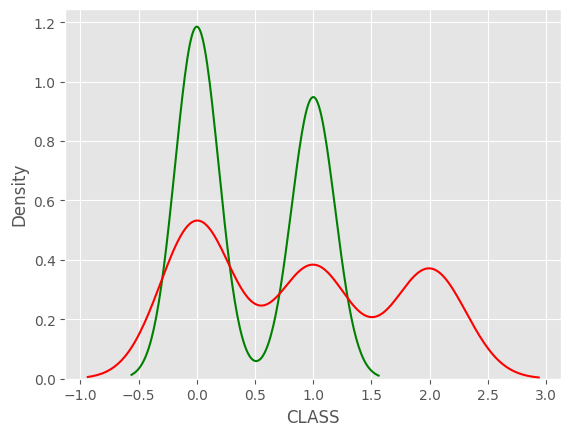

In [143]:
ax1 = sns.kdeplot(y_test, color="g", label="Actual Value")
sns.kdeplot(y_pred_kmeans, color="r", label="Fitted Values" , ax=ax1)

In [159]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_kmeans)*100))

conmat = confusion_matrix(y_test, y_pred_kmeans)
df_cm = pd.DataFrame(
        index=classnames, columns=classnames, 
    )

print(df_cm) 

Accuracy: 58.52%
     0    1
0  NaN  NaN
1  NaN  NaN


## **KESIMPULAN**

In [164]:
def get_conf_matriks_accuracy(y_actual, y_predic, cmap = None, title='Tidak ada', ):
    confusion_matrix = metrics.confusion_matrix(y_actual, y_predic)
    
    conf_matrix_value = (confusion_matrix[0,0] + confusion_matrix[1,1]) / sum(sum(confusion_matrix))
    print("Akurasi " + title + " : " , round(conf_matrix_value*100,2), "%", sep='')

In [166]:
print("Perbandingan Akurasi pada dataset Youtube04-Eminem :")
get_conf_matriks_accuracy(y_test, y_pred_clf, title='Decision Tree')
get_conf_matriks_accuracy(y_test, y_pred_knn, title='K-NN')
get_conf_matriks_accuracy(y_test, y_pred_bayes, title='Naive Bayes')

print(f"Akurasi Linear Regresi (Nilai R-square) : {mlr.score(x,y)*100:.2f}%")
print(f"Akurasi Classification Tree : {accuracy_score(y_test, y_pred_clf)*100:.2f}%")
print(f"Akurasi K-Means Clustering : {accuracy_score(y_test, y_pred_kmeans)*100:.2f}%")

Perbandingan Akurasi pada dataset Youtube04-Eminem :
Akurasi Decision Tree : 98.52%
Akurasi K-NN : 93.33%
Akurasi Naive Bayes : 44.44%
Akurasi Linear Regresi (Nilai R-square) : 72.66%
Akurasi Classification Tree : 98.52%
Akurasi K-Means Clustering : 58.52%
